<a href="https://colab.research.google.com/github/Eldave93/Seizure-Detection-Tutorials/blob/master/06.%20Dimensionality%20Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06. Dimensionality Reduction

by [David Luke Elliott](https://www.lancaster.ac.uk/psychology/about-us/people/david-elliott)
/ [GitHub](https://github.com/Eldave93) 

In order to reduce a models complexity, run time, and potential for overfitting to the training data, dimension reduction techniques can be used. Broadly they can be grouped into methods that create a subset of the original set of features (Feature Selection) and methods that create new synthetic features through combining the original features and discarding less important ones (Feature Extraction). Essentially we want to remove "uninformative infromation" and retain useful bits<sup>1</sup>. If you have too many features, it may be that some of them are highly correlated and therefore redundant. Therefore we can either select just some of them, or compress them onto a lower dimensional subspace<sup>2</sup>.

---
1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

2. Raschka, 2016

In [1]:
# THIS SEEMS TO BE A TEMP FIX TO MAKE SURE UMAP PLOT WORKS ON COLAB
# MAKE SURE YOU RESTART THE KERNEL AFTER RUNNING THIS CODE
!pip uninstall tornado -y
!pip install holoviews -U
!pip install -U ipykernel
!pip install umap-learn[plot]==0.4.1 -U
!pip install umap-learn==0.4.1

Uninstalling tornado-4.5.3:
  Successfully uninstalled tornado-4.5.3
     |████████████████████████████████| 4.2MB 2.8MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 1.3MB 30.1MB/s 
     |████████████████████████████████| 8.6MB 36.6MB/s 
     |████████████████████████████████| 501kB 50.0MB/s 
  Created wheel for bokeh: filename=bokeh-2.0.2-cp36-none-any.whl size=9072534 sha256=5115b8c20881eecf3846270361ed4f67641e8cdaaaff5b5a7862af48e1af8cc8
  Stored in directory: /root/.cache/pip/wheels/a3/5e/7d/49405a043a4714a1b66bb7a16dfe16a1f0db9217baac7c4fe3
  Created wheel for tornado: filename=tornado-6.0.4-cp36-cp36m-linux_x86_64.whl size=427636 sha256=c20b60664094f4ab181278719752217619d40325be08b324d6a04719ff57e422
  Stored in directory: /root/.cache/pip/wheels/93/84/2f/409c7b2bb3afc3aa727f7ee8787975e0793f74d1165f4d0104
Successfully built bokeh tornado
ERROR: chainer 6.5.0 has requirement typing-extensions<=3.6.6, but you'll have typing-extens

     |████████████████████████████████| 122kB 2.7MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.0 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 15.5MB 318kB/s 
     |████████████████████████████████| 1.6MB 41.7MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 645kB 46.8MB/s 
     |████████████████████████████████| 102kB 646kB/s 
  Created wheel for umap-learn: filename=umap_learn-0.4.1-cp36-none-any.whl size=66313 sha256=916f309ac88311ae3979770ee34660889c403f4580fbf1fb45a4069a81911fc1
  Stored in directory: /root/.cache/pip/wheels/0c/f0/0f/8a9ca1e4d229be3a21e1afe483acfd7ccb93e9a65cf752b446
  Created wheel for datashape: filename=datashape-0.5.2-cp36-none-any.whl size=59429 sha256=2c3f358ffc4dd1cbcc538df0dbaf1dbac5275e1c622aa7372621ee97feed5e07
  Stored in directory: /root/.cache/pip/wheels/8d/06/05/c1cba3d57bdcfd3960e3f60a9fdc97e4baef2ef09af0ad1ef8
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=25b6ba0f2b6ecfabdda5dd12064ff36abf3fa11dbfe02

# Environment Set-up
First lets start by getting our workspace ready and then loading in the data. 

In [0]:
import os                         # for file locations
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes
import tables

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [0]:
import gdown
FILE_PATH = 'UPennMayo_features.hdf5'

if not os.path.exists(FILE_PATH):
    gdown.download('https://drive.google.com/uc?id=1-0Y0eKW9hIeOdKlYbi9UAojERKbQzi5d', 
                './'+FILE_PATH, quiet=False)

In [3]:
# load features dataframe
h5file = tables.open_file(FILE_PATH, mode="r+")
h5file

File(filename=UPennMayo_features.hdf5, title='Upenn Features', mode='r+', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) 'Upenn Features'
/Patient_2 (Group) 'Participant Data'
/Patient_2/Data_x (EArray(7035, 848)) 'Feature Array'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (9, 848)
/Patient_2/Data_x_Feat_Names (Array(848,)) 'Names of Each Feature'
  atom := StringAtom(itemsize=29, shape=(), dflt=b'')
  maindim := 0
  flavor := 'numpy'
  byteorder := 'irrelevant'
  chunkshape := None
/Patient_2/Data_y (EArray(7035, 1)) 'Events Array'
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192, 1)

## Data Load

Lets load in the data. We saved the data as in Hierarchical Data Format (HDF).

In [4]:
data_x = h5file.get_node('/Patient_2/Data_x')
data_y = h5file.get_node('/Patient_2/Data_y')
data_x_labels = h5file.get_node('/Patient_2/Data_x_Feat_Names')

part_feature_df = pd.DataFrame(data_x[:], columns = data_x_labels[:].astype(str))
part_feature_df['class'] = data_y[:]
part_feature_df = part_feature_df.set_index('class')
part_feature_df.head()

,LMacro_01|2_4Hz,LMacro_01|4_8Hz,LMacro_01|8_12Hz,LMacro_01|12_30Hz,LMacro_01|30_70Hz,LMacro_01|Ratio_3_12/2_30Hz,LMacro_01|D6_mean,LMacro_01|D5_mean,LMacro_01|D4_mean,LMacro_01|D3_mean,LMacro_01|D2_mean,LMacro_01|D1_mean,LMacro_01|D6_std,LMacro_01|D5_std,LMacro_01|D4_std,LMacro_01|D3_std,LMacro_01|D2_std,LMacro_01|D1_std,LMacro_01|D6_ratio,LMacro_01|D5_ratio,LMacro_01|D4_ratio,LMacro_01|D3_ratio,LMacro_01|D2_ratio,LMacro_01|D1_ratio,LMacro_01|D6_mean_abs,LMacro_01|D5_mean_abs,LMacro_01|D4_mean_abs,LMacro_01|D3_mean_abs,LMacro_01|D2_mean_abs,LMacro_01|D1_mean_abs,LMacro_01|D6_LSWT,LMacro_01|D5_LSWT,LMacro_01|D4_LSWT,LMacro_01|D3_LSWT,LMacro_01|D2_LSWT,LMacro_01|D1_LSWT,LMacro_02|2_4Hz,LMacro_02|4_8Hz,LMacro_02|8_12Hz,LMacro_02|12_30Hz,...,LMacro_07_RMacro_05|time_corr,LMacro_07_RMacro_06|time_corr,LMacro_07_RMacro_07|time_corr,LMacro_07_RMacro_08|time_corr,LMacro_08_RMacro_01|time_corr,LMacro_08_RMacro_02|time_corr,LMacro_08_RMacro_03|time_corr,LMacro_08_RMacro_04|time_corr,LMacro_08_RMacro_05|time_corr,LMacro_08_RMacro_06|time_corr,LMacro_08_RMacro_07|time_corr,LMacro_08_RMacro_08|time_corr,RMacro_01_RMacro_02|time_corr,RMacro_01_RMacro_03|time_corr,RMacro_01_RMacro_04|time_corr,RMacro_01_RMacro_05|time_corr,RMacro_01_RMacro_06|time_corr,RMacro_01_RMacro_07|time_corr,RMacro_01_RMacro_08|time_corr,RMacro_02_RMacro_03|time_corr,RMacro_02_RMacro_04|time_corr,RMacro_02_RMacro_05|time_corr,RMacro_02_RMacro_06|time_corr,RMacro_02_RMacro_07|time_corr,RMacro_02_RMacro_08|time_corr,RMacro_03_RMacro_04|time_corr,RMacro_03_RMacro_05|time_corr,RMacro_03_RMacro_06|time_corr,RMacro_03_RMacro_07|time_corr,RMacro_03_RMacro_08|time_corr,RMacro_04_RMacro_05|time_corr,RMacro_04_RMacro_06|time_corr,RMacro_04_RMacro_07|time_corr,RMacro_04_RMacro_08|time_corr,RMacro_05_RMacro_06|time_corr,RMacro_05_RMacro_07|time_corr,RMacro_05_RMacro_08|time_corr,RMacro_06_RMacro_07|time_corr,RMacro_06_RMacro_08|time_corr,RMacro_07_RMacro_08|time_corr
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,227.771604,121.729376,104.748192,12.558394,0.647189,0.236310,-1.464481,-0.824742,0.013091,0.079837,0.007579,-0.003982,32.788547,7.787165,3.174328,2.255994,1.501909,0.434303,3.754051,0.478331,0.654988,0.968202,1.110025,0.291264,22.104887,5.888276,2.515215,1.791908,1.186303,0.345527,2.393530,0.000000,4.938845,5.224725,4.976350,4.832041,1005.364843,313.338129,313.795808,41.072159,...,0.105581,0.083218,0.037208,-0.074456,-0.232014,-0.110795,0.064210,0.231193,0.054408,0.080716,0.008344,-0.092507,0.478147,0.070836,0.276334,0.409964,0.089740,0.011427,-0.045528,0.659306,0.402787,-0.120908,-0.099517,-0.098398,-0.134968,0.671873,-0.177492,0.043530,0.109859,0.070146,0.273753,0.363735,0.389202,0.297462,0.789810,0.652605,0.519944,0.953851,0.796902,0.888274
1,162.957202,77.334727,39.298664,159.289935,17.511810,0.521757,-0.524147,-2.195927,0.170249,0.077665,-0.009410,-0.004780,136.208688,30.836280,12.684444,5.863654,2.171036,0.478162,4.499467,0.411784,0.612139,0.787675,0.749612,0.226207,110.524209,24.563843,8.780154,4.122931,1.688453,0.381939,5.750614,0.000000,6.024042,6.011127,5.849690,5.849246,177.183887,64.238290,44.758678,78.214008,...,0.368963,0.345036,0.190677,0.175533,0.143469,-0.377845,-0.132094,0.177265,0.364337,0.315025,0.180897,0.179192,0.197950,-0.024201,0.489842,0.500227,0.441391,0.083896,0.067550,0.448453,-0.143189,-0.236526,-0.318908,-0.218642,-0.218159,0.349326,0.072042,-0.015888,-0.035920,-0.016688,0.402350,0.379938,0.046323,-0.029894,0.765875,0.426919,0.379509,0.808733,0.732159,0.911896
1,7.328949,42.812358,74.461760,98.214038,8.702826,0.631694,4.117210,-0.597011,-0.399529,0.090689,0.002929,-0.009800,111.980787,21.057629,5.753481,2.588111,1.388032,0.401990,5.619444,0.338374,0.516542,0.705551,0.947942,0.290217,89.182818,15.870400,4.621165,2.022304,1.111390,0.322544,6.170474,3.438399,0.000000,5.223997,4.883751,4.643624,149.110048,61.553056,46.734910,66.373068,...,0.311119,0.386066,0.331398,0.259048,0.173879,-0.389145,-0.417331,

We'll just remove the test set, as for this dataset we dont know what they represent.

In [5]:
reduced_features = part_feature_df.loc[[0,1]]
reduced_features.head()

,LMacro_01|2_4Hz,LMacro_01|4_8Hz,LMacro_01|8_12Hz,LMacro_01|12_30Hz,LMacro_01|30_70Hz,LMacro_01|Ratio_3_12/2_30Hz,LMacro_01|D6_mean,LMacro_01|D5_mean,LMacro_01|D4_mean,LMacro_01|D3_mean,LMacro_01|D2_mean,LMacro_01|D1_mean,LMacro_01|D6_std,LMacro_01|D5_std,LMacro_01|D4_std,LMacro_01|D3_std,LMacro_01|D2_std,LMacro_01|D1_std,LMacro_01|D6_ratio,LMacro_01|D5_ratio,LMacro_01|D4_ratio,LMacro_01|D3_ratio,LMacro_01|D2_ratio,LMacro_01|D1_ratio,LMacro_01|D6_mean_abs,LMacro_01|D5_mean_abs,LMacro_01|D4_mean_abs,LMacro_01|D3_mean_abs,LMacro_01|D2_mean_abs,LMacro_01|D1_mean_abs,LMacro_01|D6_LSWT,LMacro_01|D5_LSWT,LMacro_01|D4_LSWT,LMacro_01|D3_LSWT,LMacro_01|D2_LSWT,LMacro_01|D1_LSWT,LMacro_02|2_4Hz,LMacro_02|4_8Hz,LMacro_02|8_12Hz,LMacro_02|12_30Hz,...,LMacro_07_RMacro_05|time_corr,LMacro_07_RMacro_06|time_corr,LMacro_07_RMacro_07|time_corr,LMacro_07_RMacro_08|time_corr,LMacro_08_RMacro_01|time_corr,LMacro_08_RMacro_02|time_corr,LMacro_08_RMacro_03|time_corr,LMacro_08_RMacro_04|time_corr,LMacro_08_RMacro_05|time_corr,LMacro_08_RMacro_06|time_corr,LMacro_08_RMacro_07|time_corr,LMacro_08_RMacro_08|time_corr,RMacro_01_RMacro_02|time_corr,RMacro_01_RMacro_03|time_corr,RMacro_01_RMacro_04|time_corr,RMacro_01_RMacro_05|time_corr,RMacro_01_RMacro_06|time_corr,RMacro_01_RMacro_07|time_corr,RMacro_01_RMacro_08|time_corr,RMacro_02_RMacro_03|time_corr,RMacro_02_RMacro_04|time_corr,RMacro_02_RMacro_05|time_corr,RMacro_02_RMacro_06|time_corr,RMacro_02_RMacro_07|time_corr,RMacro_02_RMacro_08|time_corr,RMacro_03_RMacro_04|time_corr,RMacro_03_RMacro_05|time_corr,RMacro_03_RMacro_06|time_corr,RMacro_03_RMacro_07|time_corr,RMacro_03_RMacro_08|time_corr,RMacro_04_RMacro_05|time_corr,RMacro_04_RMacro_06|time_corr,RMacro_04_RMacro_07|time_corr,RMacro_04_RMacro_08|time_corr,RMacro_05_RMacro_06|time_corr,RMacro_05_RMacro_07|time_corr,RMacro_05_RMacro_08|time_corr,RMacro_06_RMacro_07|time_corr,RMacro_06_RMacro_08|time_corr,RMacro_07_RMacro_08|time_corr
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,114.541010,26.387061,11.821119,1.357175,0.127231,0.080726,-0.128602,0.118216,-0.101168,-0.033279,-0.004297,0.001694,13.557896,4.324083,2.012277,1.401388,1.110230,0.385098,3.004006,0.579224,0.684463,0.893648,1.246923,0.350324,10.624583,3.536804,1.587640,1.102274,0.879269,0.308029,3.106438,3.961608,0.000000,2.507438,3.327911,3.624668,81.093381,21.245074,12.022613,1.716688,...,0.142421,0.445292,0.375804,0.048456,-0.287851,-0.255292,-0.189169,-0.323072,0.083437,0.353000,0.313551,-0.003411,-0.235130,-0.170569,-0.220663,0.649620,-0.020600,-0.345087,0.100752,0.799281,-0.212111,-0.533714,-0.237637,-0.073423,-0.217264,-0.243490,-0.387402,-0.151831,-0.017957,-0.169271,-0.303116,-0.431413,-0.376480,-0.411506,0.544665,0.179166,0.469152,0.890269,0.827349,0.822477
0,27.574621,43.245174,18.910574,0.791160,0.113143,0.028620,-0.566416,-0.064466,-0.082230,0.007399,-0.009481,-0.002008,12.721882,4.671603,2.081970,1.429230,1.163085,0.392771,2.740875,0.625647,0.695557,0.874557,1.282507,0.339322,10.070413,3.674160,1.674747,1.141394,0.935474,0.317427,0.000000,3.654221,3.131752,3.985539,3.617549,3.786875,34.090448,55.587796,23.758051,1.081294,...,0.059382,-0.075373,-0.096533,-0.022078,-0.268351,-0.628743,-0.249155,-0.291405,0.037981,-0.046959,-0.073897,-0.044187,0.380488,0.106047,-0.186159,0.161660,0.005139,-0.108882,-0.105291,0.488385,-0.218292,0.083636,0.271466,0.280665,0.136437,-0.233991,0.132623,0.174909,0.162932,0.175522,-0.427137,-0.388867,-0.327155,-0.370580,0.750489,0.593814,0.665086,0.956724,0.870345,0.912751
0,58.207500,18.142876,8.238157,1.537487,0.341276,0.179073,0.500630,-0.156088,0.016892,0.061672,-0.002595,-0.005260,27.352470,9.916045,4.451683,2.263063,1.171889,0.389263,2.593647,0.653650,0.756241,0.787538,0.911714,0.328884,19.718376,7.602567,3.543520,1.768838,0.948547,0.311962,4.234047,0.000000,3.460437,4.179866,3.143538,2.585988,42.881090,47.020922,15.018225,2.147292,...,0.037790,-0.264089,-0.315883,-0.230196,-0.278415,-0.227573,-0.16015

As we are going to later look at the channel information, lets remove the features that look at correlations between channels (because these rely on two channels).

In [6]:
display(reduced_features.shape)

reduced_features = reduced_features[reduced_features.columns.drop(list(reduced_features.filter(regex='corr')))]

display(reduced_features.shape)

(3141, 848)

(3141, 608)

## Data Preparation

In [7]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2
RANDOM_STATE = 0

# turn to numpy array
data_x = reduced_features.values

# create condition(group) array
data_y = reduced_features.index.values
    
X_train, X_test, y_train, y_test = train_test_split(data_x, 
                                                    data_y, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2512, 608) (629, 608) (2512,) (629,)


# Correlation Matrix

Lets first see how many features are correlated to each other and therefore may be redundent. For speed we will just look at the features in one channel and the same feature across multipule channels.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


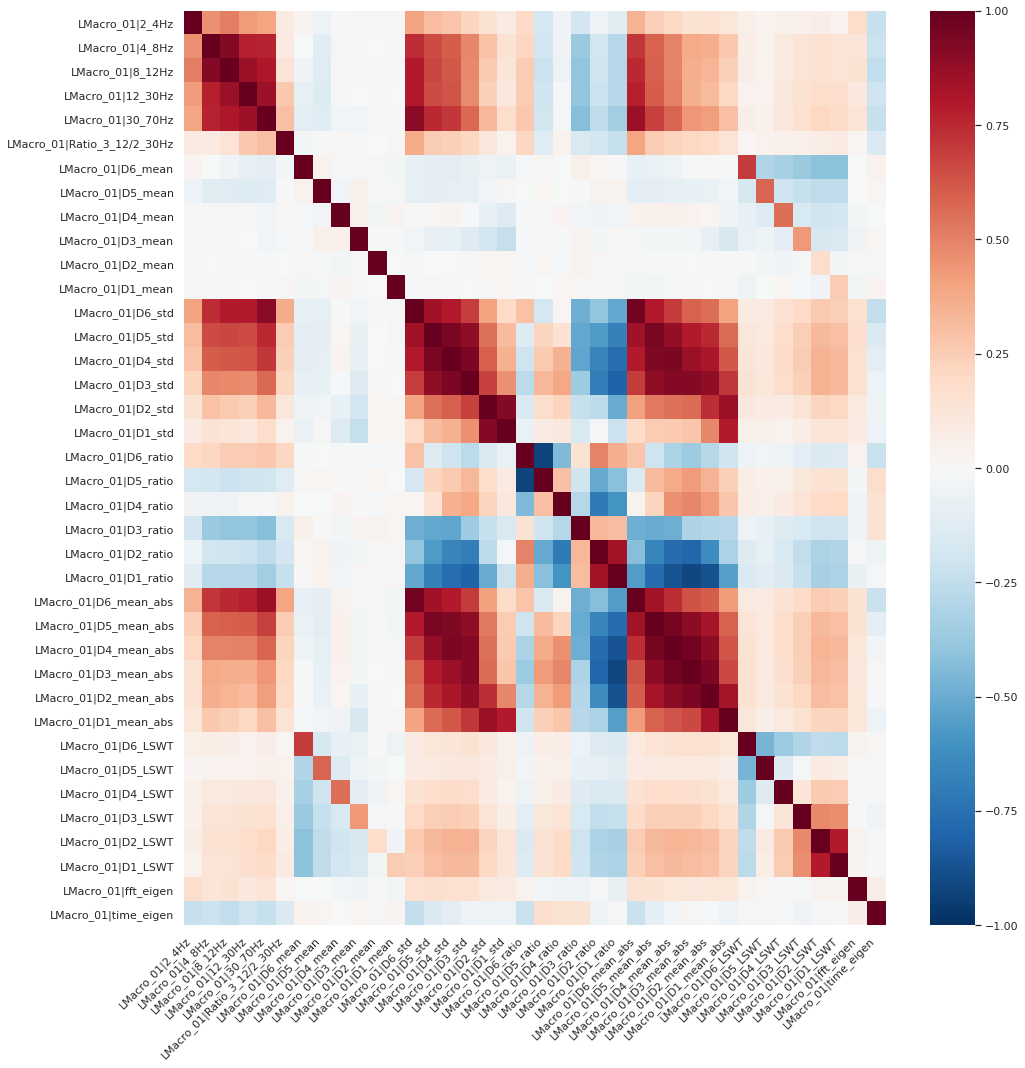

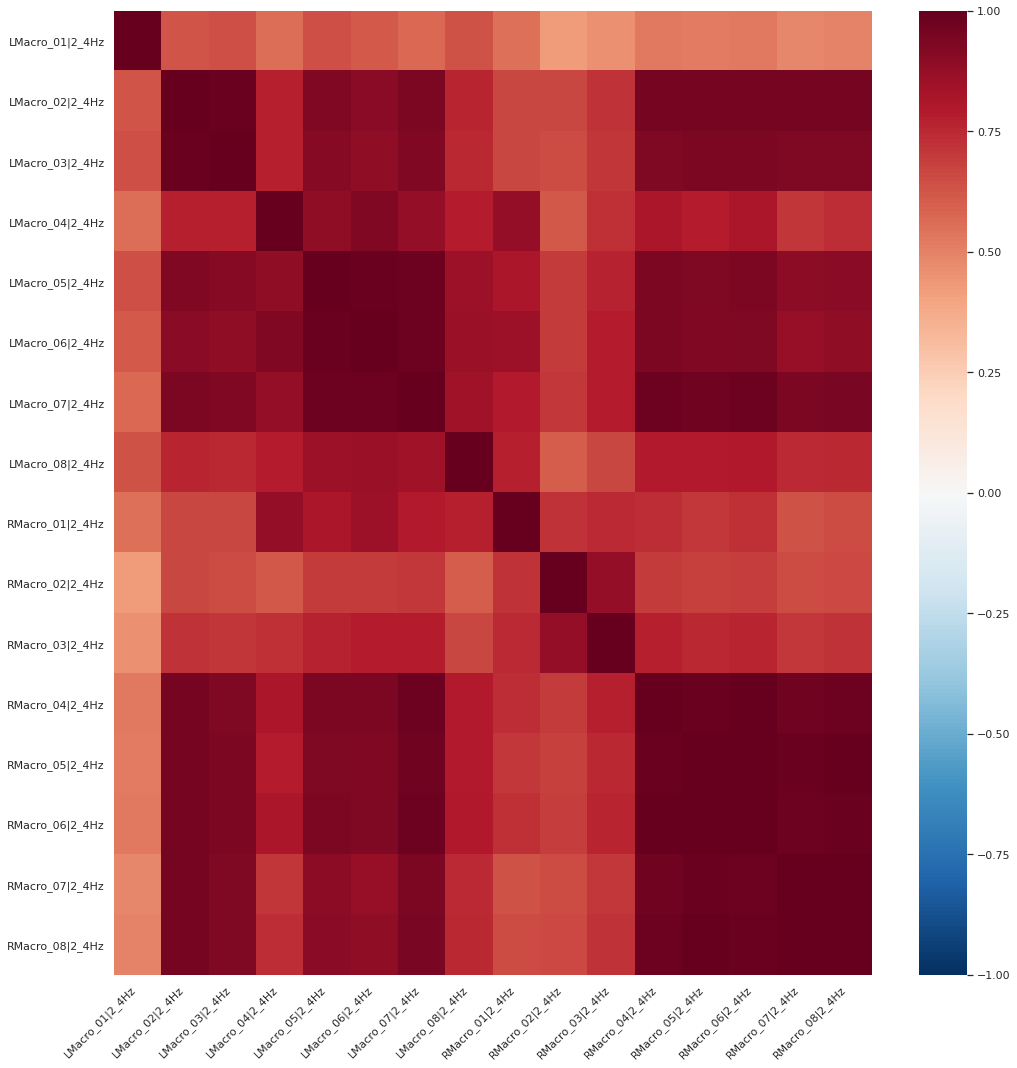

In [8]:
import seaborn as sns; sns.set(color_codes=True)
from IPython.display import Image
import numpy as np

# just first channel
first_channel = reduced_features.filter(regex='LMacro_01')
# just the first feature
first_feature = reduced_features.filter(regex='2_4Hz')

for i, data in enumerate([first_channel, first_feature]):

    correlations = data.corr()
    # plot correlation matrix
    plt.figure(figsize=(15,15))
    sns.heatmap(correlations, 
                vmin=-1, 
                vmax=1,
                xticklabels=correlations.columns.values,
                yticklabels=correlations.columns.values,
                cmap="RdBu_r"
               )
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()
    
    if i ==0:
        plt.savefig('feature_correlations.png', dpi=300)
    else:
        plt.savefig('channel_correlations.png', dpi=300)
    plt.show()

As you can see above, there are patches of highly correlated features in the same channel, and most of the information across channels is correlated to some degree in the feature plotted above. Its likely then that we would benefit from reducing our number of features.

# Feature Selection

Feature selection removes features that are not useful for classificiation to reduce model complexity. Training time for most machine learning models scales linearly with number of features, with some even worse, therefore it is useful to find a parsimonious model that does not loose predictive accuracy but is quicker to compute<sup>1</sup>. 

**TODO**
- Add in information specific to EEG from sources like <sup>2,3</sup>

---

1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

2. Alotaiby, T., El-Samie, F. E. A., Alshebeili, S. A., & Ahmad, I. (2015). A review of channel selection algorithms for EEG signal processing. EURASIP Journal on Advances in Signal Processing, 2015(1), 66.

3. Duun-Henriksen, J., Kjaer, T. W., Madsen, R. E., Remvig, L. S., Thomsen, C. E., & Sorensen, H. B. D. (2012). Channel selection for automatic seizure detection. Clinical Neurophysiology, 123(1), 84-92.

## Filtering

A computationally efficient method of selecting features is to use a filter method. Filter methods aim to remove features with a low potential to predict outputs; usually though univariate analysis before classification. A filter could be a threshold set on each features variance, or the correlation or mutual information between each feature and the response variable. Although filters are computationally efficient comparative to other feature selection methods, they are independent of the model chosen so should be used conservatively to ensure data is not removed that a model may find useful<sup>1</sup>.

---

1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

### Variance Threshold

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold.

In [9]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress
from collections import defaultdict
import pprint
pp = pprint.PrettyPrinter()

sel = VarianceThreshold(threshold=.8)
sel.fit(X_train)

# get boolian list of what is kept and what not
keep_bool = sel.get_support()
# get index of false values
remove_index = [i for i, x in enumerate(keep_bool) if not x]

# merge multiindex feature labels into 1 label list
feat_labels = reduced_features.columns
remove_list = list(feat_labels[remove_index])

print(color.BOLD+color.UNDERLINE+'Features and Channels Removed ('+str(len(remove_index))+')\n'+color.END)
pp.pprint(remove_list)

Features and Channels Removed (249)

['LMacro_01|Ratio_3_12/2_30Hz',
 'LMacro_01|D4_mean',
 'LMacro_01|D3_mean',
 'LMacro_01|D2_mean',
 'LMacro_01|D1_mean',
 'LMacro_01|D2_std',
 'LMacro_01|D1_std',
 'LMacro_01|D6_ratio',
 'LMacro_01|D5_ratio',
 'LMacro_01|D4_ratio',
 'LMacro_01|D3_ratio',
 'LMacro_01|D2_ratio',
 'LMacro_01|D1_ratio',
 'LMacro_01|D2_mean_abs',
 'LMacro_01|D1_mean_abs',
 'LMacro_02|Ratio_3_12/2_30Hz',
 'LMacro_02|D4_mean',
 'LMacro_02|D3_mean',
 'LMacro_02|D2_mean',
 'LMacro_02|D1_mean',
 'LMacro_02|D2_std',
 'LMacro_02|D1_std',
 'LMacro_02|D6_ratio',
 'LMacro_02|D5_ratio',
 'LMacro_02|D4_ratio',
 'LMacro_02|D3_ratio',
 'LMacro_02|D2_ratio',
 'LMacro_02|D1_ratio',
 'LMacro_02|D2_mean_abs',
 'LMacro_02|D1_mean_abs',
 'LMacro_03|Ratio_3_12/2_30Hz',
 'LMacro_03|D4_mean',
 'LMacro_03|D3_mean',
 'LMacro_03|D2_mean',
 'LMacro_03|D1_mean',
 'LMacro_03|D2_std',
 'LMacro_03|D1_std',
 'LMacro_03|D6_ratio',
 'LMacro_03|D5_ratio',
 'LMacro_03|D4_ratio',
 'LMacro_03|D3_ratio',
 'LMa

### Mutual Information Classification

Mutual information estimation measures the dependency between two variables by estimating the entropy from k-nearest neighbors distances. If two random variables are independent this equals 0, with higher dependency producing larger numbers<sup>1</sup>. 

For Feature Selection a threshold can be set based on the number of features you want to keep or a value theshold.

---

1. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html

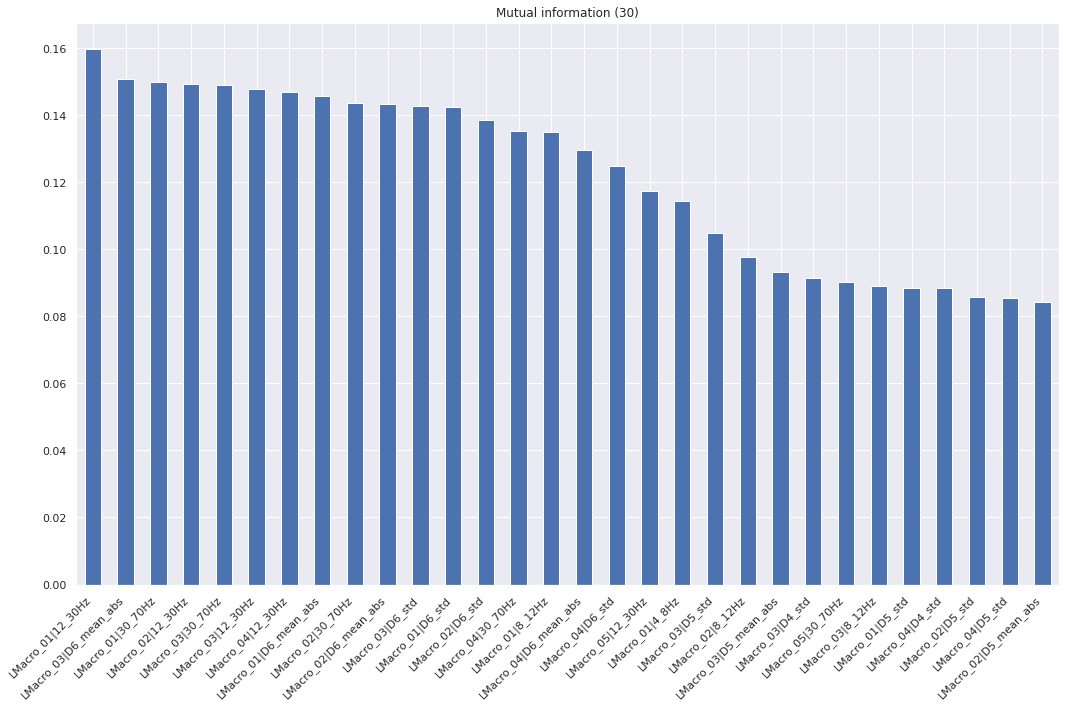

In [10]:
from sklearn.feature_selection import mutual_info_classif

plt.figure(figsize=(15,10))

mi = mutual_info_classif(X_train, y_train)
mi_series = pd.Series(mi, index=feat_labels).sort_values(ascending = False)

# lets plot the top 30
PLOT_NUM = 30
mi_series[:PLOT_NUM].plot.bar(legend = False, figsize=(15,10))
plt.title('Mutual information (' + str(PLOT_NUM) + ')')

plt.xticks(rotation=45,ha='right')
plt.tight_layout()
#plt.savefig('mutual_information.png', dpi=300)
plt.show()

## Embedded Methods

Instead of being independent, feature selection methods can be embedded in the model training process. An example would be the l1 regularizer for linear models, which imposes a sparsity constraint on the model to ensure a model favours fewer features. These methods are efficient and specific to the chosen model, but are not as powerful at wrapper methods (discussed next)<sup>1</sup>.

Below is just an example of how you could implement it in a pipeline using a Support Vector Machine.

---

1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

In [11]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', LinearSVC(random_state=RANDOM_STATE, 
                                       class_weight = 'balanced', 
                                       penalty='l2',
                                       dual=False))])

N_SPLITS = 10

StratKFold = StratifiedKFold(n_splits = N_SPLITS,
                             shuffle=False,
                             random_state=RANDOM_STATE)

scores = cross_val_score(estimator=pipe_svc, 
                         X=X_train, 
                         y=y_train, 
                         scoring = 'f1',
                         cv=StratKFold,
                         n_jobs=-1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CV accuracy scores: [0.96       0.96296296 1.         0.95652174 0.95652174 0.84615385
 0.91666667 0.95652174 0.91666667 0.88      ]
CV accuracy: 0.935 +/- 0.043
CPU times: user 56.8 ms, sys: 49.1 ms, total: 106 ms
Wall time: 24.7 s


## Wrapper Methods
Wrapper methods are also  specific to the chosen model as they directly optimise the accuracy of a classifier by trying subsets of features. This enables keeping features that are useful in combination with others, even if uninformative in isolation<sup>1</sup>. Wrapper methods are the most computationally expensive, especially when used with nonlinear classifiers.

---

1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

### Exhaustive Feature Selector

Wrapper feature selectors can be exhaustive by sampling all possible feature combinations and finding the combination that provides the greatest classifier performance. However these models might overfit to the training data and not be logical.

Lets first create a smaller dataset to demonstrate this on by only using a random subset of the features.

**Note**
- If you are using Google Colab, using the full dataset can take a while, however if using a local runtime you may have more CPU resourse. Expect to get better scores the more features you search over using `max_features` or if using the full dataset.

In [13]:
%%time
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.svm import SVC

# set the random state
np.random.seed(seed=RANDOM_STATE)
indices = np.random.randint(0,X_train.shape[1],5)
X_train_reduced = X_train[:,indices]

pipe_svc_linear = Pipeline([('scl', StandardScaler()),
                            ('clf', SVC(kernel='linear', 
                                        class_weight = 'balanced', 
                                        random_state=RANDOM_STATE))])

efs = ExhaustiveFeatureSelector(pipe_svc_linear, 
                                min_features=1, 
                                max_features=4, 
                                print_progress=False, 
                                scoring='f1',
                                cv=StratKFold, 
                                n_jobs=-1,
                                clone_estimator=True)

efs.fit(X_train_reduced, y_train, custom_feature_names=feat_labels[indices])
df = pd.DataFrame.from_dict(efs.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)

print(color.BOLD+color.UNDERLINE+"Best Found Feature Combination"+color.END)
display(df['feature_names'].iloc[0])
display(df.head())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Best Found Feature Combination


('RMacro_08|D5_ratio',
 'LMacro_06|D6_std',
 'RMacro_02|D1_LSWT',
 'LMacro_08|D5_mean_abs')

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
26,"(0, 1, 2, 4)","[0.4444444444444445, 0.35294117647058826, 0.47...",0.428699,"(RMacro_08|D5_ratio, LMacro_06|D6_std, RMacro_...",0.0557658,0.0750839,0.025028
27,"(0, 1, 3, 4)","[0.4444444444444445, 0.2941176470588235, 0.486...",0.425417,"(RMacro_08|D5_ratio, LMacro_06|D6_std, LMacro_...",0.0625656,0.0842393,0.0280798
17,"(0, 1, 4)","[0.4444444444444445, 0.30303030303030304, 0.5,...",0.423289,"(RMacro_08|D5_ratio, LMacro_06|D6_std, LMacro_...",0.05699,0.0767322,0.0255774
11,"(1, 4)","[0.41860465116279066, 0.2857142857142857, 0.54...",0.409366,"(LMacro_06|D6_std, LMacro_08|D5_mean_abs)",0.0559106,0.0752789,0.025093
23,"(1, 3, 4)","[0.41860465116279066, 0.27777777777777773, 0.5...",0.403857,"(LMacro_06|D6_std, LMacro_01|D3_mean, LMacro_0...",0.0593557,0.0799174,0.0266391


CPU times: user 138 ms, sys: 5.3 ms, total: 143 ms
Wall time: 30.7 s


We could also visualise the search to see how combining more features influences performance.

**Notes**
- Below is take from http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/

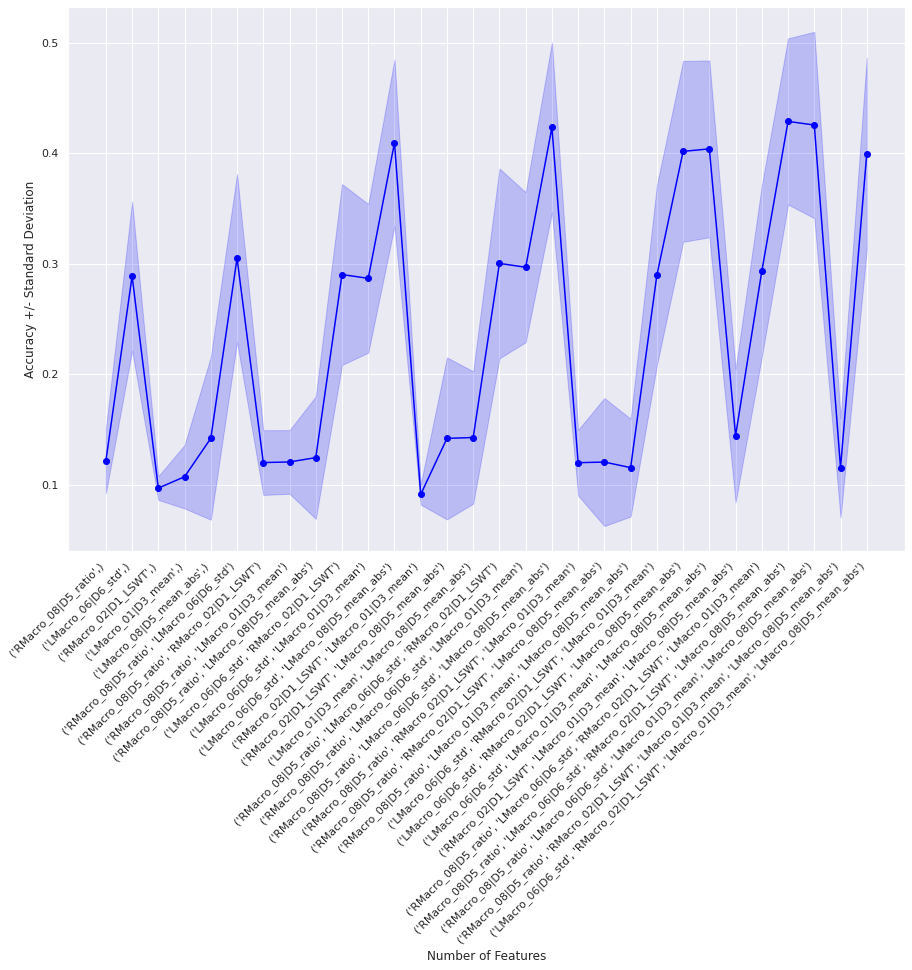

In [14]:
metric_dict = efs.get_metric_dict()

fig = plt.figure(figsize=(15,10))
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

plt.fill_between(k_feat,
                 upper,
                 lower,
                 alpha=0.2,
                 color='blue',
                 lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=45, ha='right')
plt.show()

### Sequential Feature Selector

Alternatively you can select features sequentially by removing or adding features until a subset of the desired size is reached. This is a suboptimal solution but is computationally less expensive<sup>1</sup>

As can be seen we can find a model with 4 features from our full data in a short time relative to the previous model.

---

1. http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

In [15]:
%%time
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
sfs = SequentialFeatureSelector(pipe_svc_linear,
                                k_features=4, 
                                forward=True, 
                                floating=False, 
                                verbose=2,
                                scoring='f1',
                                cv=StratKFold,
                                n_jobs=-1)

sfs.fit(X_train_reduced, y_train, custom_feature_names=feat_labels[indices])

display(pd.DataFrame.from_dict(sfs.get_metric_dict()).T)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished

[2020-05-29 14:57:51] Features: 1/4 -- score: 0.2887824769747922[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.5s finished

[2020-05-29 14:57:55] Features: 2/4 -- score: 0.40936640727905615[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.8s finished

[2020-05-29 14:57:58] Features: 3/4 -- score: 0.42328929441743757[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.1s finished

[2020-05-29 14:58:00] Features: 4/4 -- score: 0.4286

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.3508771929824561, 0.11320754716981132, 0.32...",0.288782,"(LMacro_06|D6_std,)",0.0499023,0.0671892,0.0223964
2,"(1, 4)","[0.41860465116279066, 0.2857142857142857, 0.54...",0.409366,"(LMacro_06|D6_std, LMacro_08|D5_mean_abs)",0.0559106,0.0752789,0.025093
3,"(0, 1, 4)","[0.4444444444444445, 0.30303030303030304, 0.5,...",0.423289,"(RMacro_08|D5_ratio, LMacro_06|D6_std, LMacro_...",0.05699,0.0767322,0.0255774
4,"(0, 1, 2, 4)","[0.4444444444444445, 0.35294117647058826, 0.47...",0.428699,"(RMacro_08|D5_ratio, LMacro_06|D6_std, RMacro_...",0.0557658,0.0750839,0.025028


CPU times: user 79.7 ms, sys: 7.05 ms, total: 86.8 ms
Wall time: 12.5 s


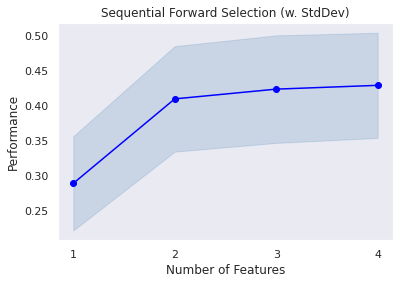

In [16]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

## Model Stacking
A method growing in popularity is to use model stacking, where the input to one model is the output of another. This allows for nonlinearities to be captured in the first model, and the potential to use a simple linear model as the last layer. Deep learning is an example of model stacking as, often neural networks are layered on top of one another, to optimize both the features and the classifier simultaneously<sup>1</sup>.

---

1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

### Assessing Feature Importances with Random Forests

An example of model stacking is to use the output of a decision tree–type model as input to a linear classifier. We can gain the importance for each feature by getting the average impurity decrease computed from all decision trees in the forest without regarding the linear separability of the classes. However, if features are highly correlated, one feature may be ranked highly while the information of the others not being fully captured<sup>1</sup>. 

This method has been previously used to find the best few EEG channels for absence seizure detection using the same spectral feature set in each channel of a 23 channel EEG system<sup>2</sup>. Indeed limited-channel EEG for seizure detection makes wearable EEG monitoring practical due to faster run time, lower power consumption, and increased accuracy by avoiding non-focal/unnecessary channels.

Similar to Birjandtalab et al. (2017)<sup>2</sup> and Truong et al. (2017)<sup>3</sup>, we will do a random forest procedure on the EEG feature set to find the important features.

---

1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.
2. Birjandtalab, J., Pouyan, M. B., Cogan, D., Nourani, M., & Harvey, J. (2017). Automated seizure detection using limited-channel EEG and non-linear dimension reduction. Computers in biology and medicine, 82, 49-58.
3.  Truong, N. D., Kuhlmann, L., Bonyadi, M. R., Yang, J., Faulks, A., & Kavehei, O. (2017). Supervised learning in automatic channel selection for epileptic seizure detection. Expert Systems with Applications, 86, 199–207. https://doi.org/10.1016/j.eswa.2017.05.055

In [17]:
%%time
from sklearn.ensemble import RandomForestClassifier

# create a forest classifier
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=1000,
                                max_features = 'sqrt',
                                random_state=RANDOM_STATE,
                                n_jobs=-1)

# fit the classifier
forest.fit(X_train, y_train)

# get the importances for the features
importances = forest.feature_importances_

importances_series = pd.Series(importances,index=feat_labels).sort_values(ascending = False)

CPU times: user 42.9 s, sys: 216 ms, total: 43.2 s
Wall time: 22.4 s


Now lets plot the top 30 features to see how they contributed.

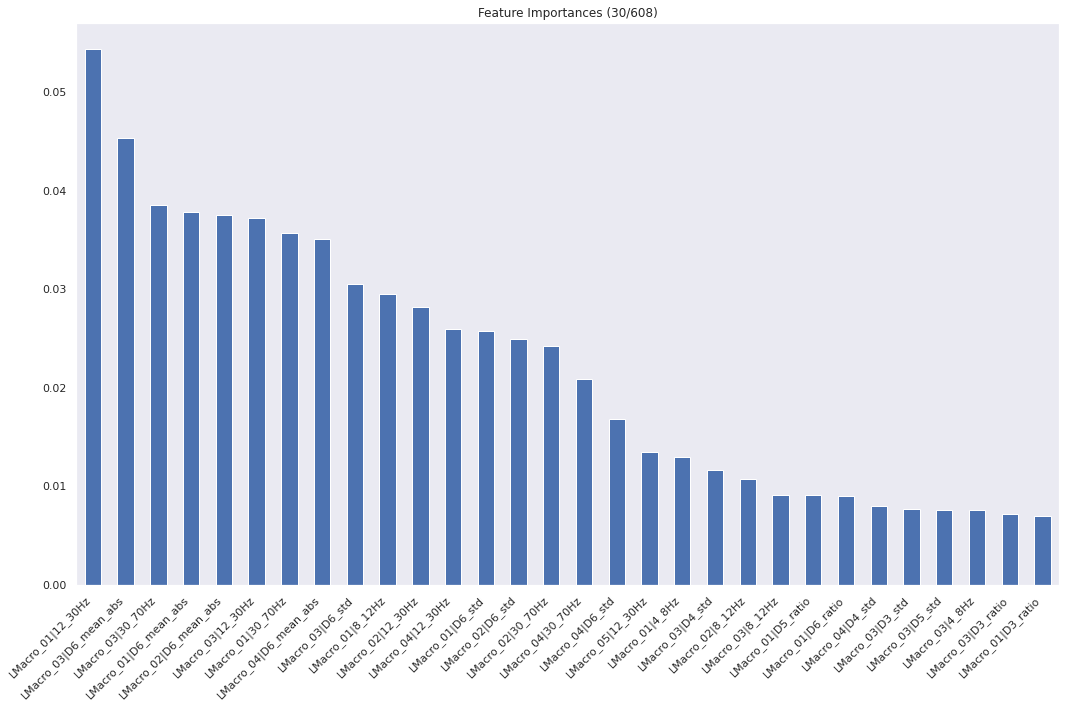

In [18]:
PLOT_LIMIT = 30

# plot the important features
plt.figure(figsize=(15,10))
importances_series[:PLOT_LIMIT].plot.bar(legend =False, grid=False)
plt.title('Feature Importances ('+str(PLOT_LIMIT)+'/'+str(len(importances_series))+')')

plt.xticks(rotation=45,ha='right')
plt.tight_layout()

plt.savefig('forest_importances.png', dpi=300)
plt.show()

We can further break this down into EEG channels and features as the importances sum to 1. As you may have noticed, the way I saved the features was to divide the channel name from the feature name using a |, so lets split them up using that here.

In [19]:
importances_multi_index = importances_series.copy()
list_of_lists = importances_series.index.str.split('|')
tuple_of_tuples = tuple(tuple(x) for x in list_of_lists)
importances_multi_index.index = pd.MultiIndex.from_tuples(tuple_of_tuples)
importances_multi_index.index.names = ['channel', 'feature']
importances_multi_index.head()

channel    feature    
LMacro_01  12_30Hz        0.054267
LMacro_03  D6_mean_abs    0.045238
           30_70Hz        0.038462
LMacro_01  D6_mean_abs    0.037804
LMacro_02  D6_mean_abs    0.037460
dtype: float64

Using this, we can see that 4 EEG channels in particular are contributing the most to classification.

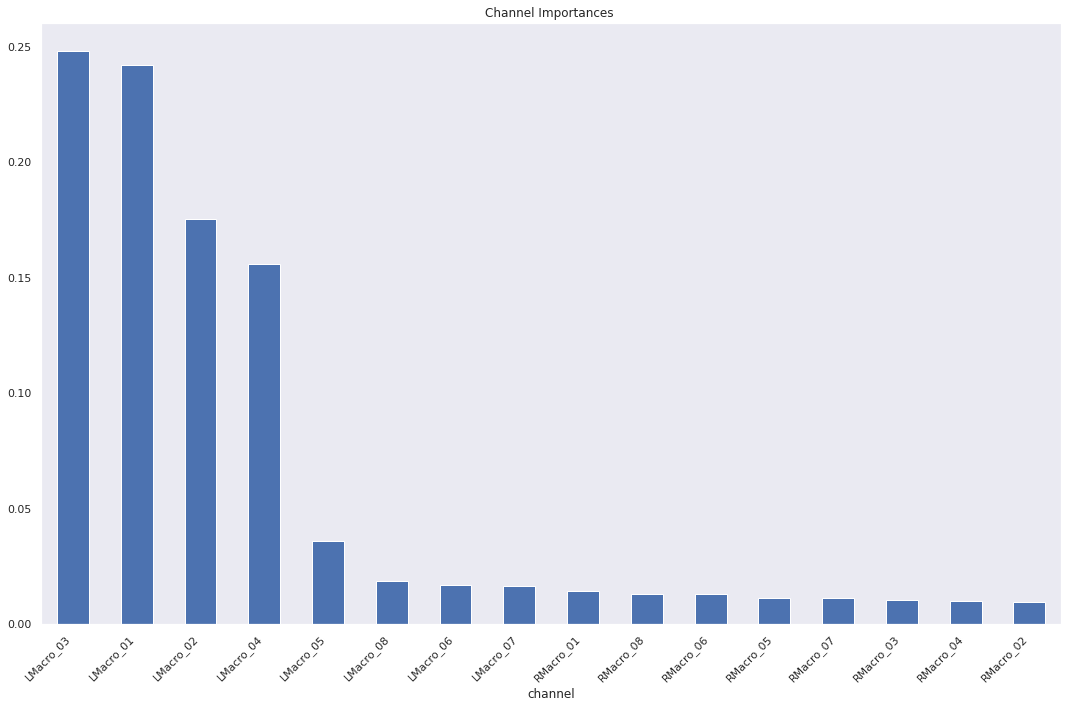

In [20]:
plt.figure(figsize=(15,10))

importances_channel = importances_multi_index.groupby('channel').sum()
importances_channel.sort_values(ascending = False).plot.bar(legend =False, grid=False)

plt.title('Channel Importances ')

plt.xticks(rotation=45,ha='right')
plt.tight_layout()

#plt.savefig(image_file_path, dpi=300)
plt.show()

We can also see that certain features have been chosen to be the most important to detection.

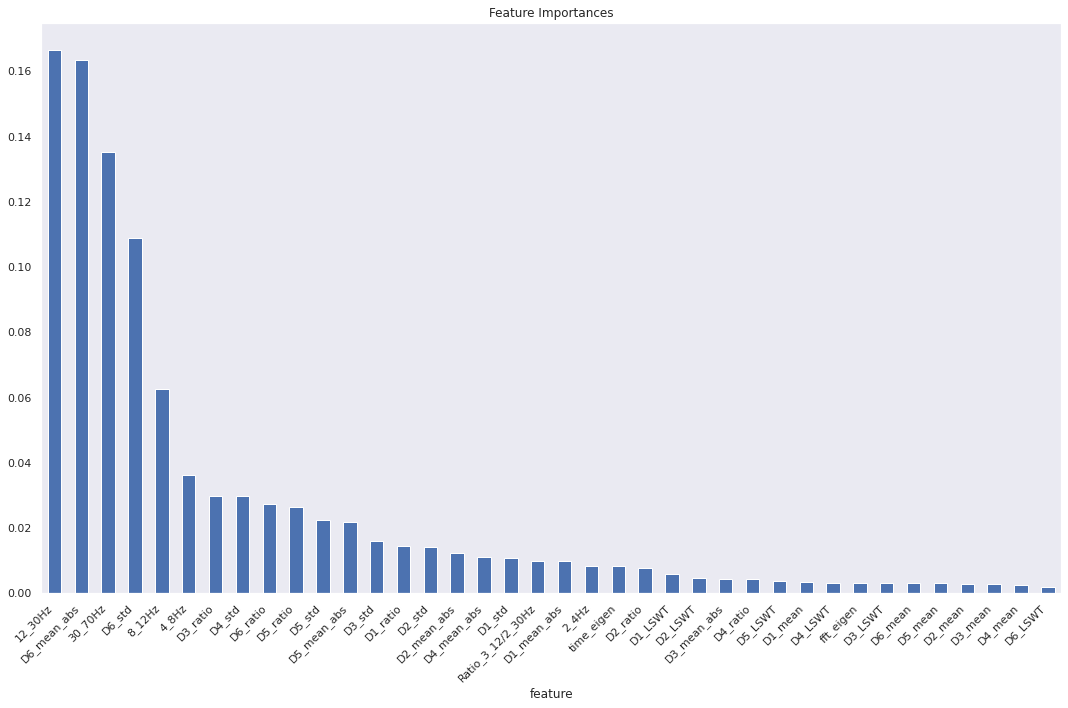

In [21]:
plt.figure(figsize=(15,10))

importances_channel = importances_multi_index.groupby('feature').sum()
importances_channel.sort_values(ascending = False).plot.bar(legend =False, grid=False)
plt.title('Feature Importances')

plt.xticks(rotation=45,ha='right')
plt.tight_layout()

#plt.savefig(image_file_path, dpi=300)
plt.show()

Rather than manually setting a theshold like we have done (looking at the top 30) we can put it in a pipeline and use the SelectFromModel function from Scikit-learn. Using this we can still provide both a numeric theshold or we could use a heuristic such as the mean and median<sup>1</sup>.

---

1. http://scikit-learn.org/stable/modules/feature_selection.html

In [22]:
%%time

from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC

clf = Pipeline([
  ('feature_selection', SelectFromModel(RandomForestClassifier(criterion='gini',
                                                               n_estimators=1000,
                                                               max_features = 'sqrt',
                                                               random_state=0,
                                                               n_jobs=-1), 
                                        threshold = 'mean')),
  ('classification', SVC(kernel='rbf', random_state=RANDOM_STATE, class_weight = 'balanced'))
])

scores = cross_val_score(estimator=pipe_svc, 
                         X=X_train, 
                         y=y_train, 
                         scoring = 'f1',
                         cv=StratKFold,
                         n_jobs=-1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.96       0.96296296 1.         0.95652174 0.95652174 0.84615385
 0.91666667 0.95652174 0.91666667 0.88      ]
CV accuracy: 0.935 +/- 0.043
CPU times: user 47.8 ms, sys: 6.1 ms, total: 53.9 ms
Wall time: 23.9 s


# Feature Extraction

Similar to feature selection, different feature extraction methods can be used to reduce the number of features for classification. Feature extraction differs from feature selection as data is transformed into a new feature space rather than keeping the original features. As well as speeding up training, dimensionality reduction is useful for data visualisation as it can reduce a high-dimensional training set into a two or three dimensional set<sup>1</sup>. 

Blind source separation (BSS) broadly encompasses approaches which aim to separate a set of mixed signals into their component sources with little information on the mixing process.

Below is a list of demensionality reduction techniques we wont go over but may be work looking into further:
- Locally Linear Embedding
    - A manifold learning technique that measures how each training instance liniearly relates to its closest neighbors and looking for a low-dimensional represention here these are best preserved<sup>1</sup>
- Multidimensional Scaling
    - reduces dimensionality wholst preserving instance distances<sup>1</sup>
- Isomap
    - Connects each instance to its nearest neighbour and reduces dimensionality whilst trying to preserve the shortest path between instances(geodesic distances)<sup>1</sup>
- t-Distributed Stochastic Neighbor Embeddin (t-SNE)
    - Reduces dimensionality wholst trying to keep similar instances close and dissimilar apart<sup>1</sup>
- Linear Discriminant Analysis (LDA)
    - Is a classification method but during training learns the most discriminative axis between classes and uses this to project the data onto a hyperplane. LDA is good to use before another classifier such as SVM<sup>1</sup>

**Notes**
- [This] is a good lecture on three dimensionality Reduction techniques; PCA, t-SNE, and UMAP

---

1. Geron2017

[This]: https://youtu.be/YPJQydzTLwQ

## PCA

Common in the machine learning literature is the use of Principal Component Analysis (PCA) to find vectors that best explain a data's variability. As some features may be highly correlated to others, PCA can be used to compresses them into an equal or lower dimensional subspace. PCA finds directions of maximum variance, with the orthogonal axes (principle components) of the new subspace giving directions of maximum variance. When transforming data onto the new sub-space, the first principle component will have the largest variance, with subsequent components decreasing in magnitude and being uncorrelated (mutually orthogonal) to the other components. 

As PCA is sensitive to data scales, components need to be standardized before applying PCA because equal importance should be given to all features despite being measured on different scales. PCA is an unsupervised linear transformation, meaning it does not take into account class labels and treats data as linearly separable, but a kernelized version (KPCA) can also be used to project a feature space into a higher dimensionality, on which standard PCA is applied to project the data back onto a lower-dimensional subspace<sup>1</sup>. PCA is an unsupervised method which ignores class labels 

For both standard and kernel PCA, when used for dimensionality reduction, a method must be used regarding how many principal components to use; which can be based on a trade-off between computationally efficiency and classifier performance<sup>1</sup>, or the use of a threshold that accounts for a desired proportion of total variance<sup>2</sup>. 

Lets have a look at how many principle components account for 80% of the datas variance - a commonly used threshold.

---

1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.

2. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

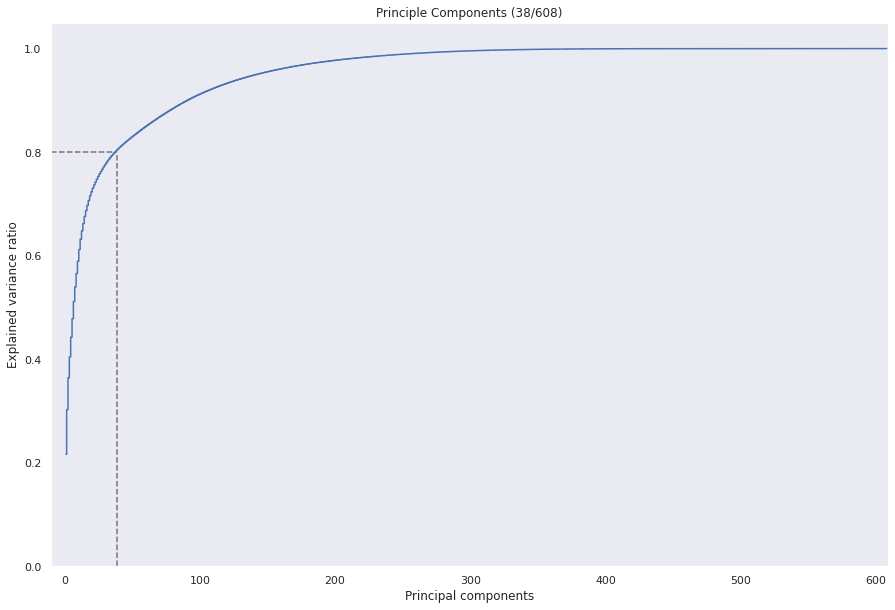

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

VARIANCE_EXPLAINED = 0.8
    
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

pca = PCA(n_components=None, random_state = 0)
pca.fit(X_train_std)

pca_thesh = PCA(n_components=VARIANCE_EXPLAINED, svd_solver='full', random_state = 0)
X_train_pca = pca_thesh.fit_transform(X_train_std)

plt.figure(figsize=(15,10))
#plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), 
         np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylim(0,1.05)
plt.xlim(-10,len(pca.explained_variance_ratio_)+1)
plt.grid(False)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Principle Components (' + str(X_train_pca.shape[1])+'/'+str(len(pca.explained_variance_ratio_))+ ')')
plt.axvline(x=X_train_pca.shape[1]+.5, ymax=VARIANCE_EXPLAINED-0.04, alpha=.5, color='black', linestyle = '--')
plt.hlines(y=VARIANCE_EXPLAINED, xmin=-10, xmax =X_train_pca.shape[1]+.5, alpha=.5, color='black', linestyle = '--')

#plt.tight_layout()
#plt.savefig('Principle Components.png', dpi=300)
plt.show()

The preceding PCA requires all the training set in memory to run the algorithm.. However there are incremental PCA algorithms that can be fed one mini-batch at a time.

In [24]:
from sklearn.decomposition import IncrementalPCA

n_batches = 20
inc_pca = IncrementalPCA(n_components = 80)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)
X_reduced.shape

(2512, 80)

### Kernel PCA

We have come across the Kernel trick previously when talking about Support Vector Machines, to enable non linear classification. This trick can also be applied to PCA<sup>1</sup> and is useful for preserving instance clusters and unravelling datasets that are close to a twisted manifold.

As PCA is unsupervised, theres no performance measure you can use to select the best kernel or hyperparamters. However a gridsearch will help find the best for a given classifier in a two step pipeline<sup>2</sup>

**NOTE**
- As on the cloud this takes ages, we can use the reduced dataset from before to demonstrate.

---
1. Schölkopf, B., Smola, A., & Müller, K. R. (1997, October). Kernel principal component analysis. In International Conference on Artificial Neural Networks (pp. 583-588). Springer, Berlin, Heidelberg.
2. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="liblinear"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train_reduced, y_train)

print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}


The limitations of PCA are that the transformation results in components that are hard to theoretically interpret and it can be computationally expensive <sup>1</sup>. Furthermore, data with large outliers, such as raw counts of movie views, should have these trimmed or scaled (e.g. log transformation) as correlation and variance satisitics used in PCA are sensitive to such outliers<sup>1</sup>.

---

1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

## ICA

**TODO**
- Create this section

## UMAP
Many dimensionality reduction algorithms model the *manifold* on which the training data lies (Manifold Learning). This relies on the manifold hypothesis that most real-world datasets lie close to a lower-dimensional manifold<sup>4</sup>. One such method is T-Distributed Stochastic Neighbor Embedding (t-SNE); which is commonly used for data visualisation. It has also been applied to seizure detection as a feature extraction technique before using a KNN classifier<sup>1</sup>. However t-SNE is not intended primarily as a preprocessor for models as it fits clusters onto the training data which are difficult to then apply to the testing data. 

Conversely, Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation as well as non-linear dimension reduction<sup>2</sup>. UMAP is intended as a replacement for t-SNE as it has better runtime performance and often preserves more global structure. As well as unsupervised dimension reduction (like PCA or t-SNE), class labels can also be used; also allowing for a combined approach using labelled data embedding with new unlabelled points added after. UMAP scales well in embedding dimensions allowing for the reduction of data down to any number of dimensions with minimal computational cost, unlike t-SNE. A number of metrics can be used to compute the ambient space of the input data; such as euclidean, mahalanobis, and cosine.

UMAP has several hyperparameters that impact embedding. Lets start by looking at the number of nearest neighbours, which controls the degree of local or global structure used when estimating the manifold structure of the data.

**NOTES**
- Like t-SNE, the use of UMAP for clustering is [controversial]
- t-SNE has exponentinal cost as you embed to higher demensions (say 3 rather than 2), UMAP is linear as you embed into higher demensions.
- https://umap-learn.readthedocs.io/en/latest/
- https://www.youtube.com/watch?v=YPJQydzTLwQ&t=521s
- https://github.com/amueller/scipy-2016-sklearn/issues/78

---

1. Birjandtalab, J., Pouyan, M. B., Cogan, D., Nourani, M., & Harvey, J. (2017). Automated seizure detection using limited-channel EEG and non-linear dimension reduction. Computers in biology and medicine, 82, 49-58.

2. McInnes, L., Healy, J., Saul, N., & Grossberger, L. (2018). UMAP. Retrieved July 22, 2018, from https://github.com/lmcinnes/umap 

3. Birjandtalab et al. (2017)

4. Geron2017

[this]: https://github.com/amueller/scipy-2016-sklearn/issues/78

[controversial]: https://umap-learn.readthedocs.io/en/latest/clustering.html)

[umap]: https://umap-learn.readthedocs.io/en/latest/clustering.html

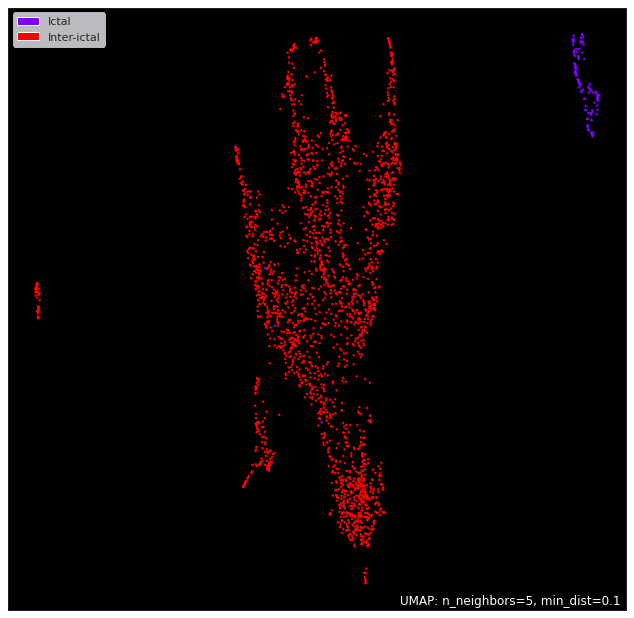

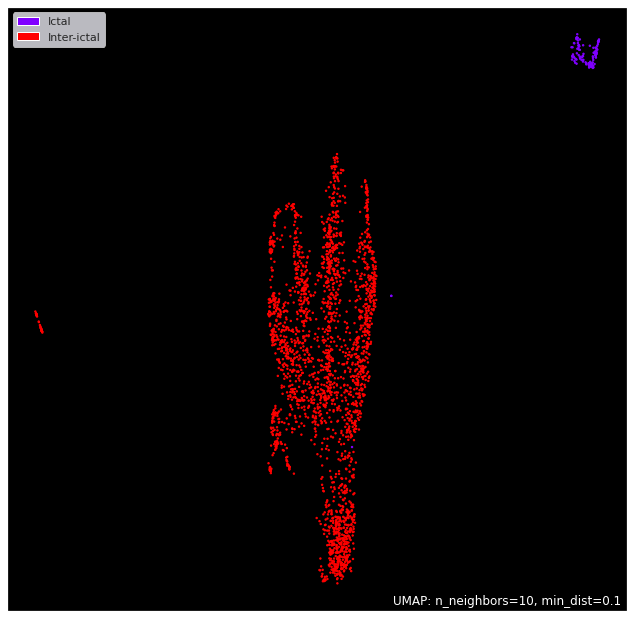

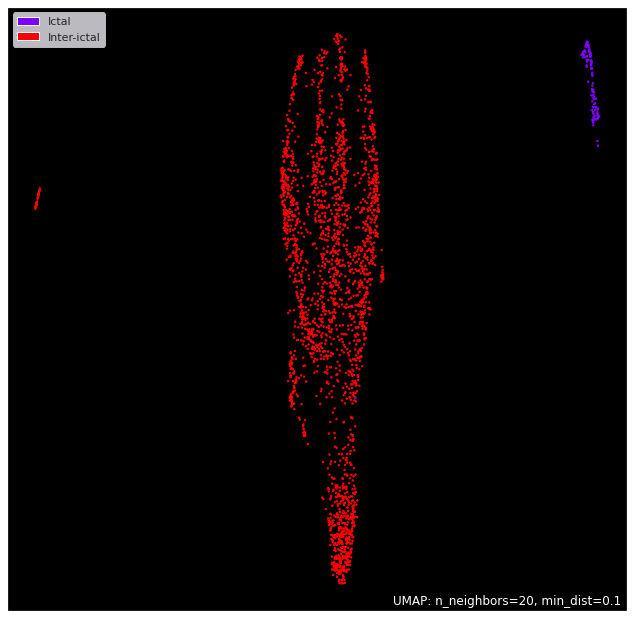

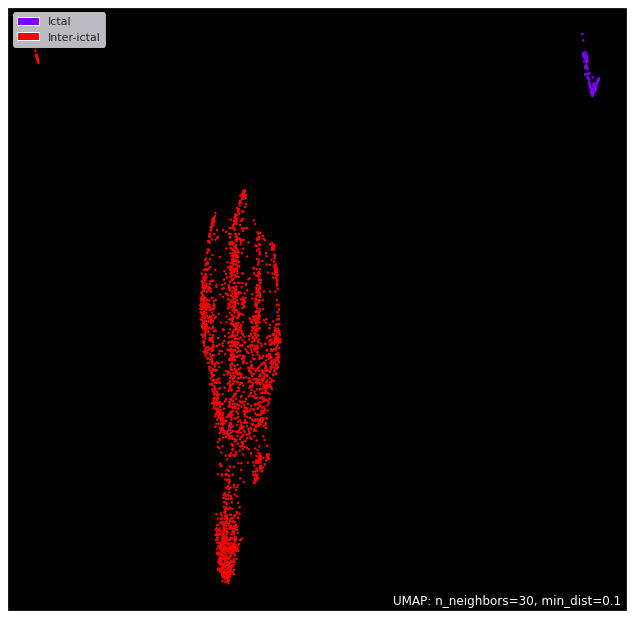

In [26]:
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import umap.plot

for neighbour in [5,10,20,30]:
    umap_pipe = Pipeline([
        ('scl', StandardScaler()),
        ('umap', UMAP(n_neighbors=neighbour,
                    random_state=RANDOM_STATE))
    ])

    umap_pipe.fit(X_train, y_train)

    ax = umap.plot.points(umap_pipe['umap'], 
                        labels=np.where(y_train ==0, 'Inter-ictal', 'Ictal'), 
                        theme='fire')
    plt.show()

Now lets look at fixing `n_neighbours` to 20 and look at how `min_dist` affects things. The minimum distance between points in low-dimensional embeddings can be used to control how tightly points are together, with smaller values useful for clustering and larger values for preserving broad topological structure.

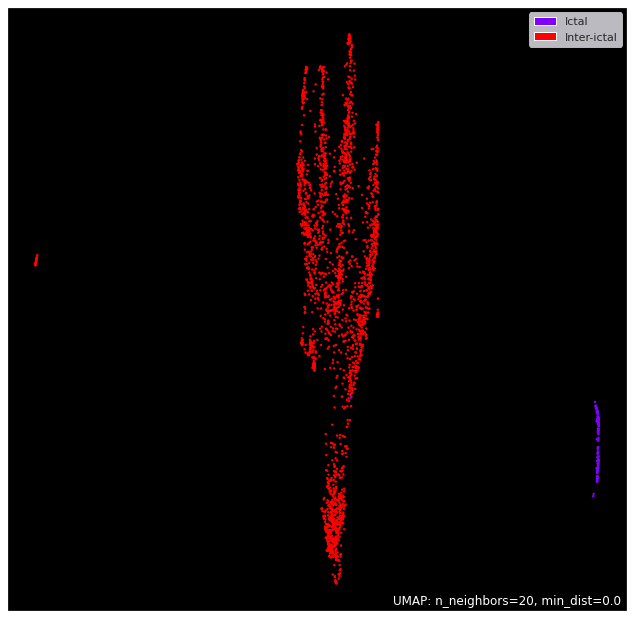

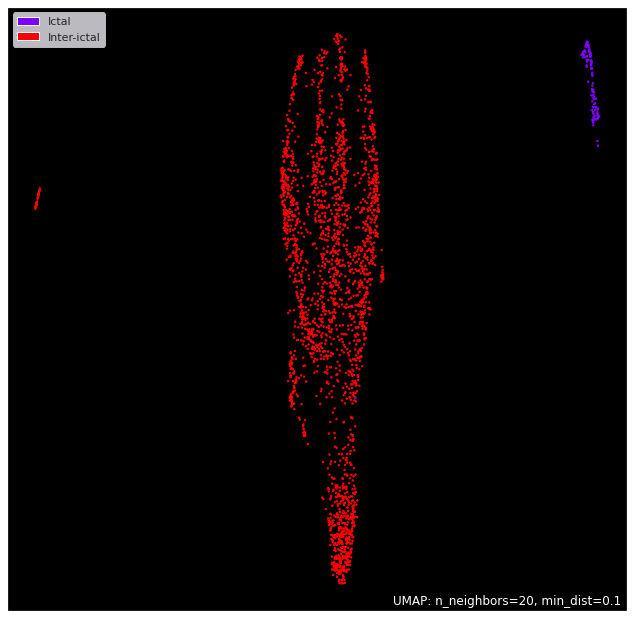

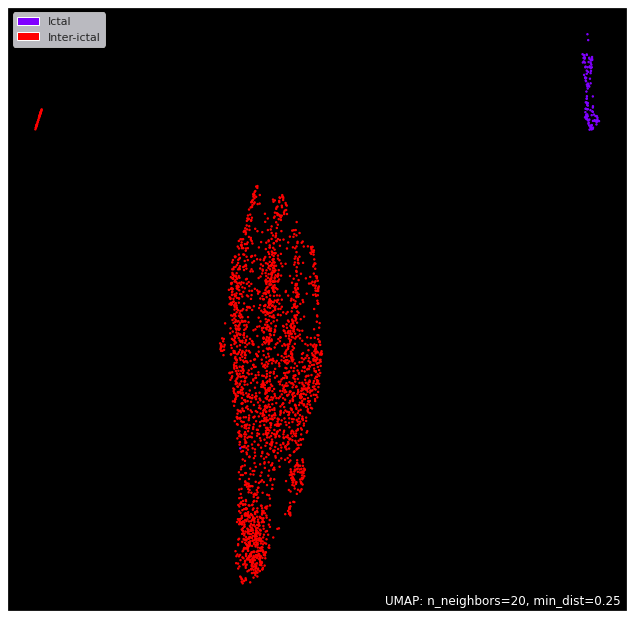

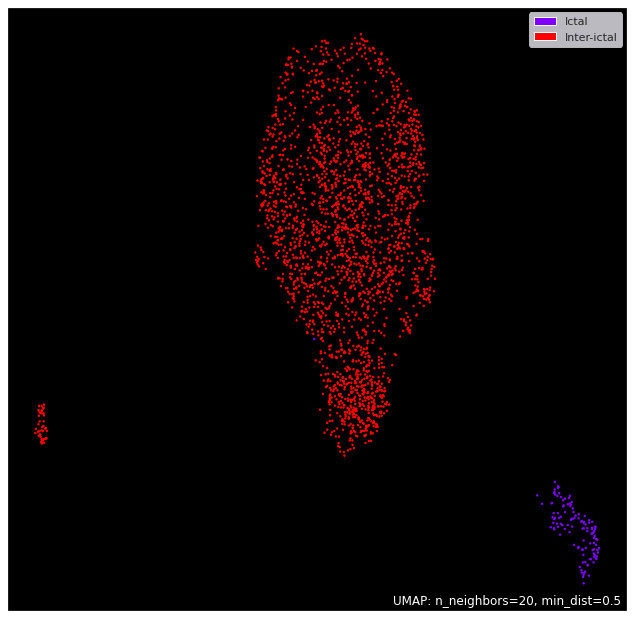

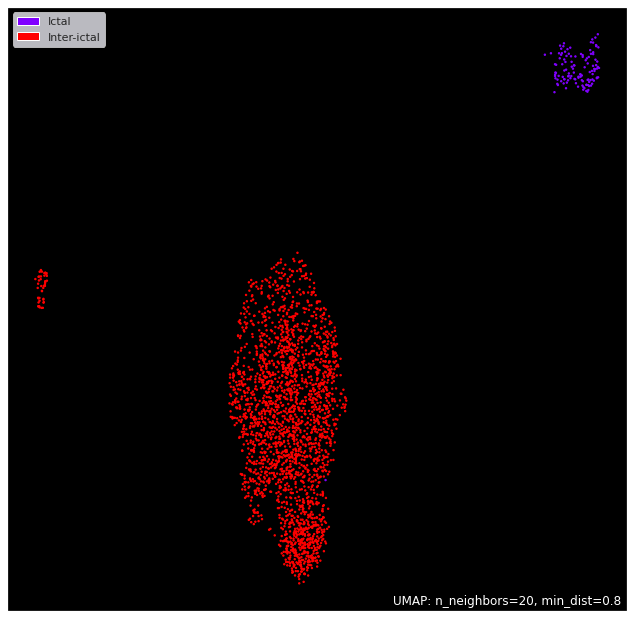

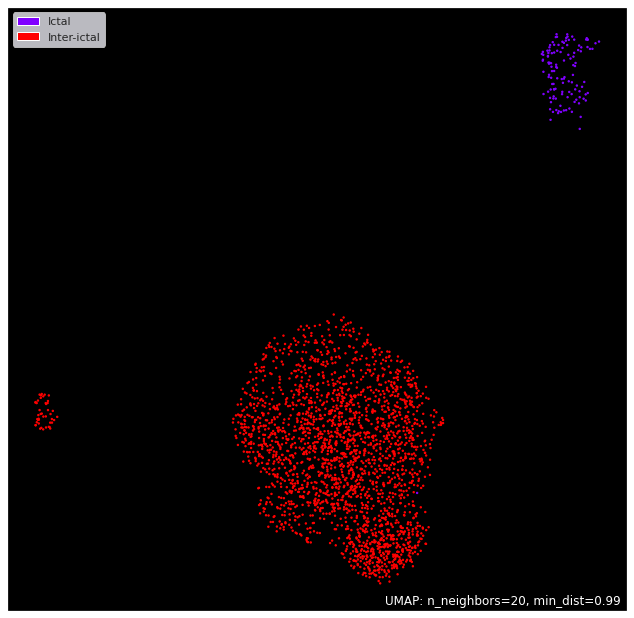

In [27]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    umap_pipe = Pipeline([
        ('scl', StandardScaler()),
        ('umap', UMAP(n_neighbors=20,
                      min_dist=d,
                      random_state=RANDOM_STATE))
    ])

    umap_pipe.fit(X_train, y_train)

    ax = umap.plot.points(umap_pipe['umap'], 
                        labels=np.where(y_train ==0, 'Inter-ictal', 'Ictal'), 
                        theme='fire')
    plt.show()

So far we have been using UMAP with labels (so supervised), so lets see the differences between supervised and unsupervised.

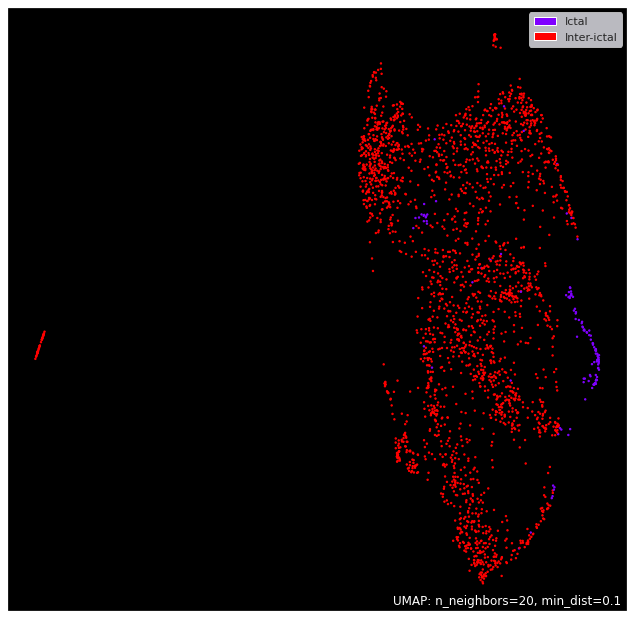

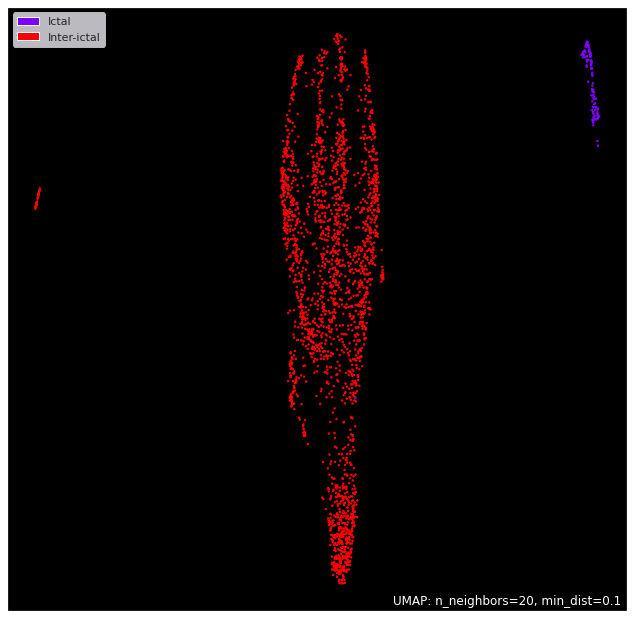

In [28]:
# lets put the two pipelines in a dictionary to use next
umap_pipe_dict = {}

for fit_type in ['No Labels', 'Labels']:
    umap_pipe = Pipeline([
        ('scl', StandardScaler()),
        ('umap', UMAP(n_neighbors=20,
                      #min_dist=0.99,
                      random_state=RANDOM_STATE))
    ])

    if fit_type =='Labels':
        umap_pipe.fit(X_train, y_train)
    else:
        umap_pipe.fit(X_train)

    umap_pipe_dict[fit_type] = umap_pipe
    
    ax = umap.plot.points(umap_pipe['umap'], 
                        labels=np.where(y_train ==0, 'Inter-ictal', 'Ictal'), 
                        theme='fire')
    #plt.title('Binary Classification Embedded via UMAP using ' +fit_type)
    plt.savefig('UMAP_Binary_'+fit_type+'.png', dpi=300, bbox_inches='tight')
    plt.show()

UMAP comes with a number of diagnositic plots as well, which are useful as well as nice to look at...

No Labels


/usr/local/lib/python3.6/dist-packages/umap/plot.py:205: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "_nhood_compare" failed type inference due to: Use of unsupported NumPy function 'numpy.intersect1d' or unsupported use of the function.

File "../usr/local/lib/python3.6/dist-packages/umap/plot.py", line 211:
def _nhood_compare(indices_left, indices_right):
    <source elided>
    for i in range(indices_left.shape[0]):
        intersection_size = np.intersect1d(indices_left[i], indices_right[i]).shape[0]
        ^

[1] During: typing of get attribute at /usr/local/lib/python3.6/dist-packages/umap/plot.py (211)

File "../usr/local/lib/python3.6/dist-packages/umap/plot.py", line 211:
def _nhood_compare(indices_left, indices_right):
    <source elided>
    for i in range(indices_left.shape[0]):
        intersection_size = np.intersect1d(indices_left[i], indices_right[i]).shape[0]
        ^

  @numba.jit()
/usr/local/lib/python3.6/dis

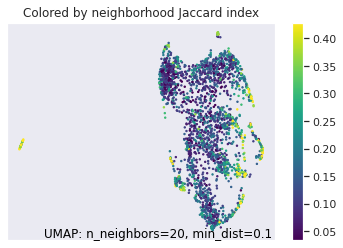

Labels


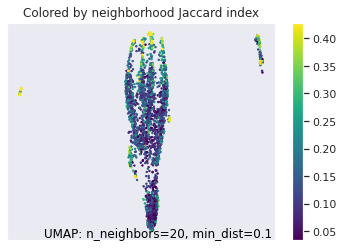

In [29]:
for umap_pipe_type in umap_pipe_dict:
    print(color.BOLD+color.UNDERLINE+umap_pipe_type+color.END)
    umap_pipe = umap_pipe_dict[umap_pipe_type]
    umap.plot.diagnostic(umap_pipe['umap'], diagnostic_type='neighborhood')
    plt.show()

**NOTE**
- This one can take a while to plot so we'll just plot the labelled one

/usr/local/lib/python3.6/dist-packages/umap/plot.py:849: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


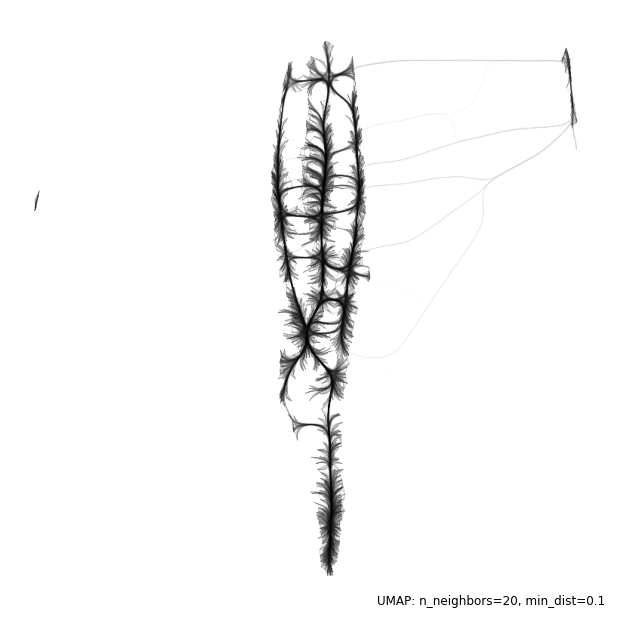

In [30]:
umap.plot.connectivity(umap_pipe['umap'], edge_bundling='hammer')
plt.savefig('UMAP_Binary_hammer.png', dpi=300, bbox_inches='tight')

We can even easily make an interactive version...

In [31]:
umap.plot.output_notebook()
labelled_y = np.where(y_train ==0, 'Interictal', 'Ictal')
p = umap.plot.interactive(umap_pipe['umap'], 
                        labels=labelled_y, 
                        theme='fire', 
                        hover_data = pd.DataFrame({'index':np.arange(len(y_train)),
                                                   'label':labelled_y,}),
                        point_size=4
                        )
umap.plot.show(p)

However it is worth noting that when used for clustering data, UMAP and t-SNE do not completely preserve density and can result in a finer clustering than is present in the data. Never-the-less, UMAP does preserve more global structure and creating meaningful separation between connected components meaning it is more useful than t-SNE for clustering. However these clusters are nots as interpretable as PCA where the axis are the direction of maximum variance.

**TODO**
- Maybe look into using UMAP to plot the outlier bits of data as I am interested in why the top left is separated and the one ictal segment in amongst the interictal.

# Exercises

Below are a few suggested exercises that may help improve your skills.

1. Do the inc_pca on ALL the participants so you dont need to load it all into memory at once

# License

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.